# Basis da Soja na região de Barreiras-BA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.signal import hilbert
import openpyxl 
%run Funcoes.ipynb

In [2]:
soja_df = pd.read_excel(r"C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\Excel Preço local Barreiras.xlsx")    #o r antes da string significa uma string raw em que o caminho do arquivo é lido normalmente
soja_df

,Data,Preço
0,2012-01-02,41.5
1,2012-01-03,41.5
2,2012-01-04,41.5
3,2012-01-05,41.5
4,2012-01-06,41.5
...,...,...
2508,2024-02-05,100.13
2509,2024-02-06,100.13
2510,2024-02-07,101.25
2511,2024-02-08,101.13


In [3]:
soja_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    2513 non-null   datetime64[ns]
 1   Preço   2513 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 39.4+ KB


In [4]:
soja_df = soja_df.rename(columns={'Data':'DATA'})
soja_df = soja_df.set_index('DATA')
soja_df

,Preço
DATA,
2012-01-02,41.5
2012-01-03,41.5
2012-01-04,41.5
2012-01-05,41.5
2012-01-06,41.5
...,...
2024-02-05,100.13
2024-02-06,100.13
2024-02-07,101.25


In [5]:
soja_df['Preço'] = pd.to_numeric(soja_df['Preço'], errors='coerce')
soja_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2513 entries, 2012-01-02 to 2024-02-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preço   2512 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


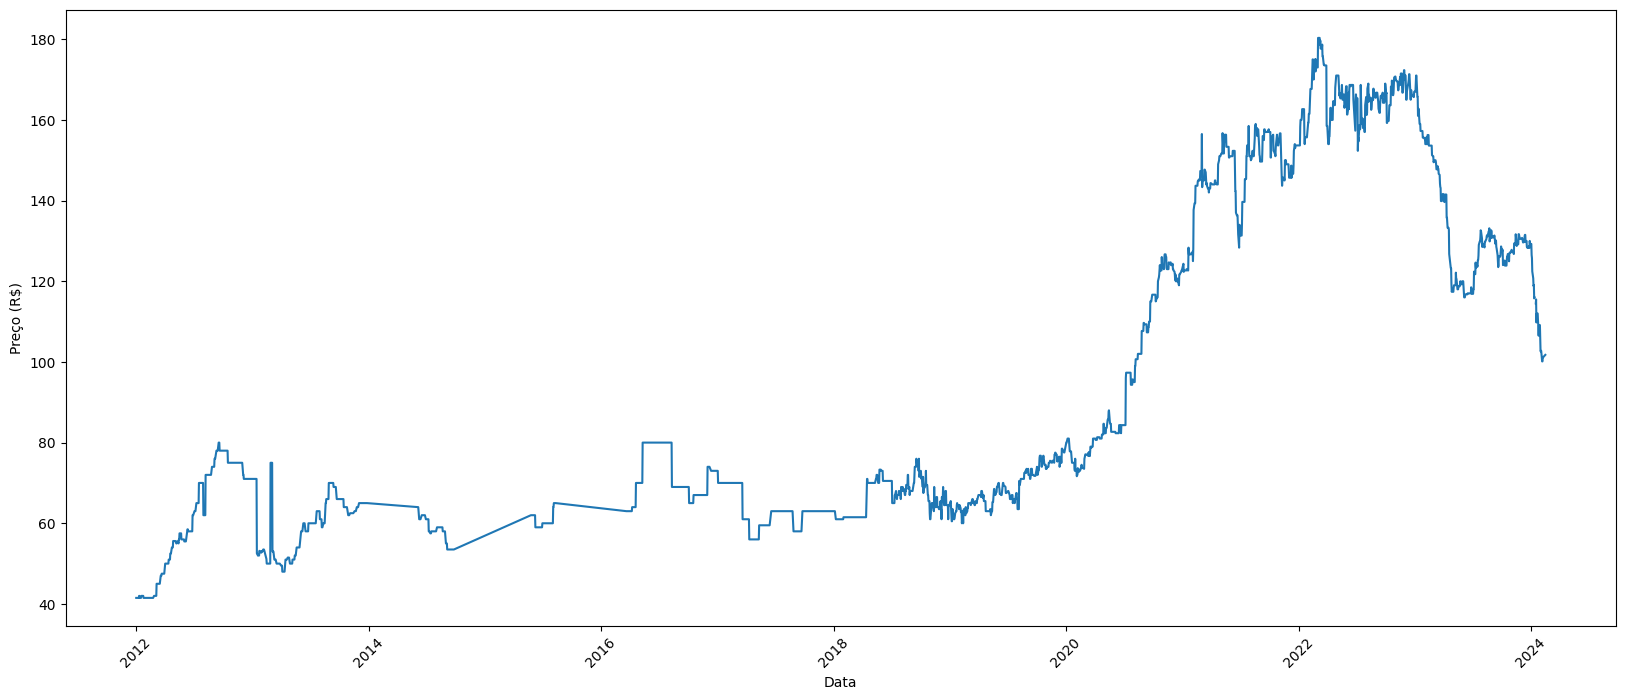

In [6]:
plt.figure(figsize=(20,8))
plt.plot(soja_df['Preço'])
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.show()

In [7]:
soja_df.dropna(subset=['Preço'],inplace=True)
soja_df = soja_df.rename(columns={'Preço':'PRECOLOCAL'})
soja_df.iloc[1450:1470]

,PRECOLOCAL
DATA,
2019-09-20,72.00
2019-09-23,71.75
2019-09-24,71.75
2019-09-25,71.75
2019-09-26,71.75
2019-09-27,71.75
2019-09-30,73.00
2019-10-01,73.50
2019-10-02,74.00


In [8]:
futuro_df = pd.read_csv(r'C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\soybean-prices-historical-chart-data.csv')

futuro_df

,date,value
0,1968-12-05,2.4375
1,1968-12-06,2.4475
2,1968-12-09,2.4363
3,1968-12-10,2.4375
4,1968-12-11,2.4463
...,...,...
13912,2024-02-09,11.9600
13913,2024-02-12,11.9300
13914,2024-02-13,11.8700
13915,2024-02-14,11.6800


In [9]:
futuro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13917 entries, 0 to 13916
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    13917 non-null  object 
 1    value  13917 non-null  float64
dtypes: float64(1), object(1)
memory usage: 217.6+ KB


In [10]:
futuro_df = futuro_df.rename(columns={'date':'DATA', ' value':'PRECOFUTURO'})
futuro_df['DATA'] = pd.to_datetime(futuro_df['DATA'])
futuro_df.set_index('DATA', inplace=True)

futuro_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13917 entries, 1968-12-05 to 2024-02-15
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PRECOFUTURO  13917 non-null  float64
dtypes: float64(1)
memory usage: 217.5 KB


In [11]:
futuro_df

,PRECOFUTURO
DATA,
1968-12-05,2.4375
1968-12-06,2.4475
1968-12-09,2.4363
1968-12-10,2.4375
1968-12-11,2.4463
...,...
2024-02-09,11.9600
2024-02-12,11.9300
2024-02-13,11.8700


In [12]:
sojas_df = pd.merge(soja_df['PRECOLOCAL'], futuro_df, how='left', on='DATA')
sojas_df.loc['2022-01-14':'2022-01-20']

,PRECOLOCAL,PRECOFUTURO
DATA,,
2022-01-14,162.67,13.6975
2022-01-17,162.67,NaN
2022-01-18,162.67,13.6125
2022-01-19,156.50,13.9125
2022-01-20,154.00,14.2575


### Preenchendo valores NaN com o valor anterior

In [13]:
quant_nulo = sojas_df.PRECOFUTURO.isna().sum()
print(quant_nulo)

55


In [14]:
sojas_df[sojas_df.PRECOFUTURO.isna()==True].index

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-05-28', '2012-07-04',
               '2012-09-03', '2012-11-22', '2013-01-21', '2013-02-18',
               '2013-05-27', '2013-07-04', '2013-09-02', '2013-11-28',
               '2014-07-04', '2014-09-01', '2015-07-03', '2016-04-02',
               '2016-05-30', '2016-07-04', '2016-09-05', '2016-11-24',
               '2016-12-26', '2017-01-02', '2017-01-16', '2017-02-20',
               '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-23',
               '2018-01-15', '2018-02-19', '2018-05-28', '2018-07-04',
               '2018-09-03', '2018-11-22', '2019-01-21', '2019-02-18',
               '2019-05-27', '2019-07-04', '2019-09-02', '2019-11-28',
               '2020-01-20', '2020-02-17', '2020-07-03', '2020-11-26',
               '2021-01-18', '2021-05-31', '2021-07-05', '2021-11-20',
               '2021-11-25', '2022-01-17', '2022-05-30', '2022-12-03',
               '2023-11-21', '2023-11-22', '2023-11-23'],
              dtype

In [15]:
sojas_df = sojas_df.drop('2012-01-02')
sojas_df.head()

,PRECOLOCAL,PRECOFUTURO
DATA,,
2012-01-03,41.5,12.275
2012-01-04,41.5,12.300
2012-01-05,41.5,12.090
2012-01-06,41.5,11.965
2012-01-09,41.5,12.330


In [16]:
sojas_df = preenche_anterior(sojas_df, 'PRECOFUTURO')
sojas_df.head(20)

,PRECOLOCAL,PRECOFUTURO
DATA,,
2012-01-03,41.5,12.2750
2012-01-04,41.5,12.3000
2012-01-05,41.5,12.0900
2012-01-06,41.5,11.9650
2012-01-09,41.5,12.3300
2012-01-10,41.5,12.3200
2012-01-11,42.0,12.0300
2012-01-12,42.0,11.8250
2012-01-13,41.5,11.5825


In [17]:
sojas_df[sojas_df.PRECOFUTURO.isna()==True].index

DatetimeIndex([], dtype='datetime64[ns]', name='DATA', freq=None)

### Importando os valores de dólar

In [18]:
from requests import get
url = "https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarPeriodo(dataInicial=@dataInicial,dataFinalCotacao=@dataFinalCotacao)?@dataInicial='01-03-2012'&@dataFinalCotacao='02-15-2024'&$top=1000000&$format=json&$select=cotacaoCompra,dataHoraCotacao"
r = get(url)
r = r.json()
dolar_df = pd.DataFrame(r['value'])
dolar_df

,cotacaoCompra,dataHoraCotacao
0,1.8450,2012-01-03 13:06:40.81
1,1.8265,2012-01-04 13:09:47.168
2,1.8365,2012-01-05 13:15:24.169
3,1.8442,2012-01-06 13:09:54.909
4,1.8435,2012-01-09 13:03:03.456
...,...,...
3037,4.9602,2024-02-07 14:22:27.517
3038,4.9798,2024-02-08 15:58:03.35
3039,4.9711,2024-02-09 17:00:17.365
3040,4.9717,2024-02-14 16:08:18.894


In [19]:
dolar_df = dolar_df[['dataHoraCotacao','cotacaoCompra']].rename(columns={'cotacaoCompra':'DOLAR_PTAX', 'dataHoraCotacao':'DATA'}).copy()
dolar_df.DATA = pd.to_datetime(dolar_df.DATA).dt.strftime('%Y-%m-%d')
dolar_df.DATA = pd.to_datetime(dolar_df.DATA)
dolar_df.set_index('DATA', inplace=True)

In [20]:
dolar_df.head()

,DOLAR_PTAX
DATA,
2012-01-03,1.8450
2012-01-04,1.8265
2012-01-05,1.8365
2012-01-06,1.8442
2012-01-09,1.8435


In [21]:
result_df = pd.merge(sojas_df[['PRECOLOCAL', 'PRECOFUTURO']], dolar_df, on='DATA')
result_df

,PRECOLOCAL,PRECOFUTURO,DOLAR_PTAX
DATA,,,
2012-01-03,41.50,12.275,1.8450
2012-01-04,41.50,12.300,1.8265
2012-01-05,41.50,12.090,1.8365
2012-01-06,41.50,11.965,1.8442
2012-01-09,41.50,12.330,1.8435
...,...,...,...
2024-02-05,100.13,11.980,5.0047
2024-02-06,100.13,12.000,4.9681
2024-02-07,101.25,11.900,4.9602


In [22]:
conversao_saca_bushel = 2.2046
result_df.PRECOLOCAL = (result_df.PRECOLOCAL / result_df.DOLAR_PTAX) / conversao_saca_bushel
result_df

,PRECOLOCAL,PRECOFUTURO,DOLAR_PTAX
DATA,,,
2012-01-03,10.202860,12.275,1.8450
2012-01-04,10.306201,12.300,1.8265
2012-01-05,10.250083,12.090,1.8365
2012-01-06,10.207286,11.965,1.8442
2012-01-09,10.211162,12.330,1.8435
...,...,...,...
2024-02-05,9.075203,11.980,5.0047
2024-02-06,9.142060,12.000,4.9681
2024-02-07,9.259042,11.900,4.9602


In [23]:
result_df['BASIS'] = (result_df.PRECOLOCAL - result_df.PRECOFUTURO)*100
result_df

,PRECOLOCAL,PRECOFUTURO,DOLAR_PTAX,BASIS
DATA,,,,
2012-01-03,10.202860,12.275,1.8450,-207.214010
2012-01-04,10.306201,12.300,1.8265,-199.379879
2012-01-05,10.250083,12.090,1.8365,-183.991750
2012-01-06,10.207286,11.965,1.8442,-175.771418
2012-01-09,10.211162,12.330,1.8435,-211.883834
...,...,...,...,...
2024-02-05,9.075203,11.980,5.0047,-290.479668
2024-02-06,9.142060,12.000,4.9681,-285.793964
2024-02-07,9.259042,11.900,4.9602,-264.095828


### Visualização

<Axes: xlabel='DATA'>

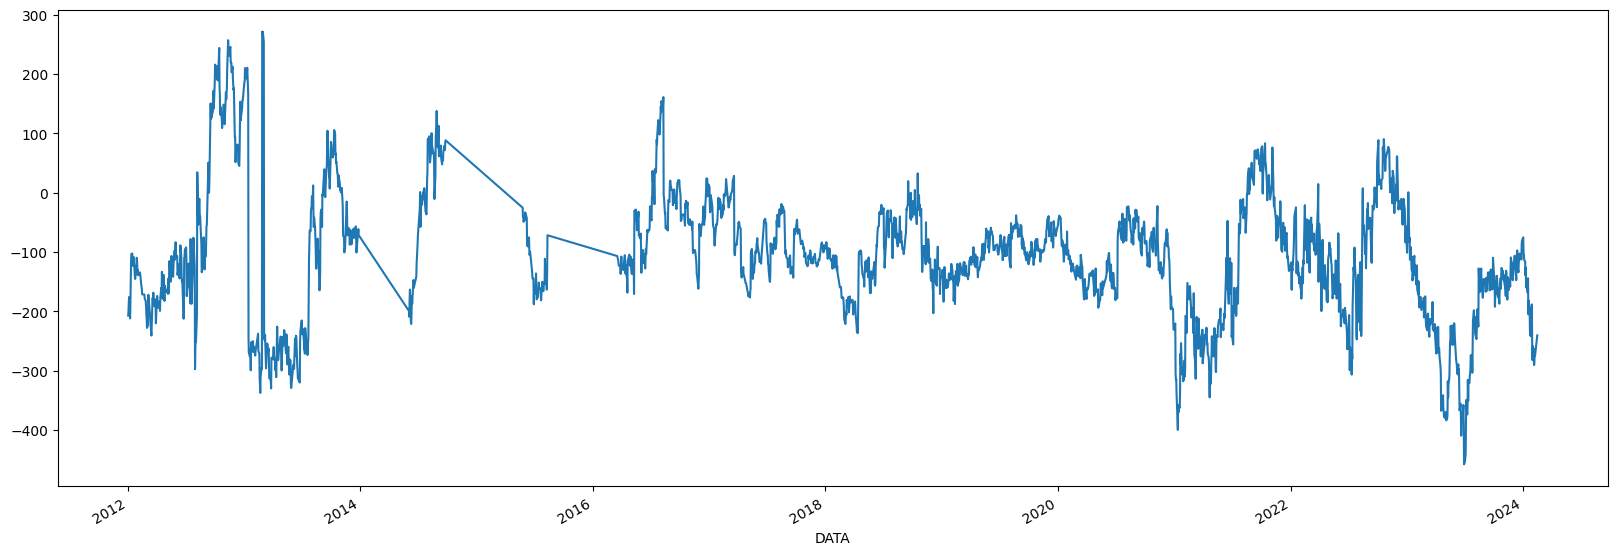

In [24]:
result_df['BASIS'].plot(figsize=(20,7))

## Decomposição do basis, dolar, físico e futuro

In [25]:
result_df = result_df.drop(result_df.index[result_df.index <= '2016-01-01'])
result_df

,PRECOLOCAL,PRECOFUTURO,DOLAR_PTAX,BASIS
DATA,,,,
2016-03-18,7.907198,8.9750,3.6140,-106.780229
2016-03-21,7.889079,9.0200,3.6223,-113.092054
2016-03-22,7.923202,9.1025,3.6067,-117.929803
2016-03-23,7.823850,9.0525,3.6525,-122.864989
2016-03-28,7.850502,9.0900,3.6401,-123.949794
...,...,...,...,...
2024-02-05,9.075203,11.9800,5.0047,-290.479668
2024-02-06,9.142060,12.0000,4.9681,-285.793964
2024-02-07,9.259042,11.9000,4.9602,-264.095828


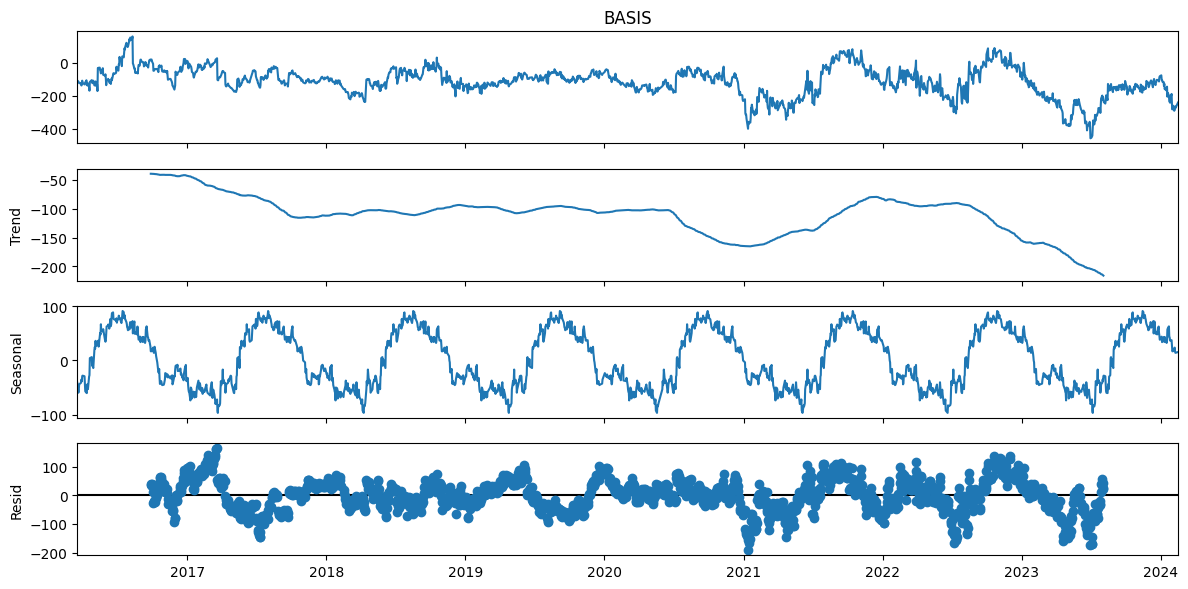

In [26]:
decomp_basis = seasonal_decompose(result_df['BASIS'], model='additive', period=252)
fig = decomp_basis.plot()
fig.set_size_inches((12, 6))
fig.tight_layout()
plt.show()

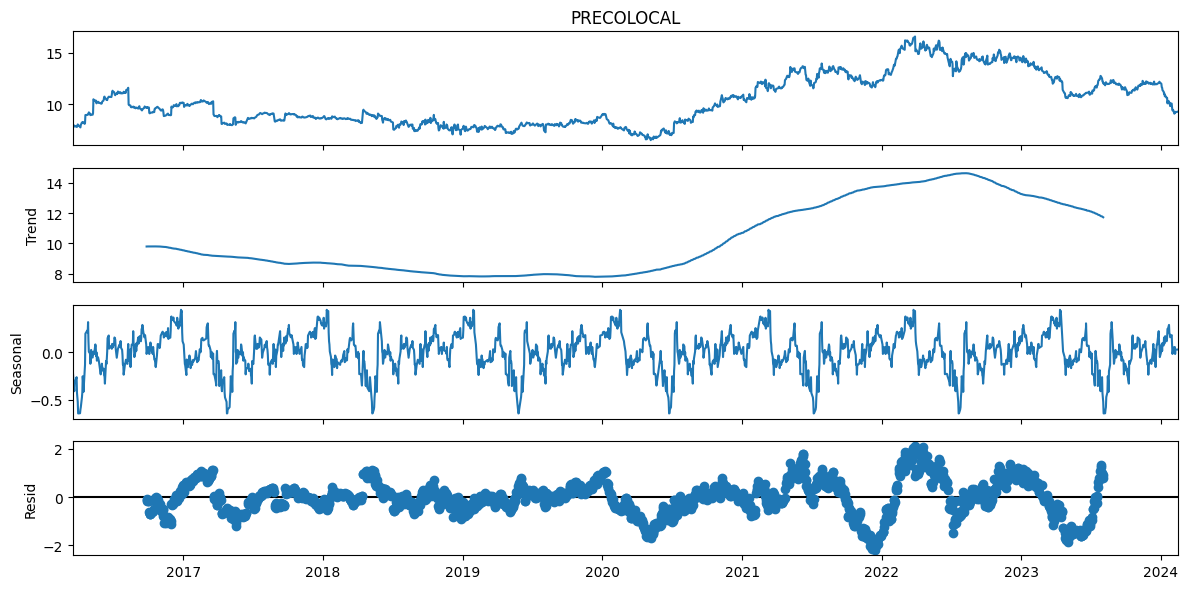

In [27]:
decomp_fis = seasonal_decompose(result_df['PRECOLOCAL'], model='additive', period=252)
fig = decomp_fis.plot()
fig.set_size_inches((12, 6))
fig.tight_layout()
plt.show()

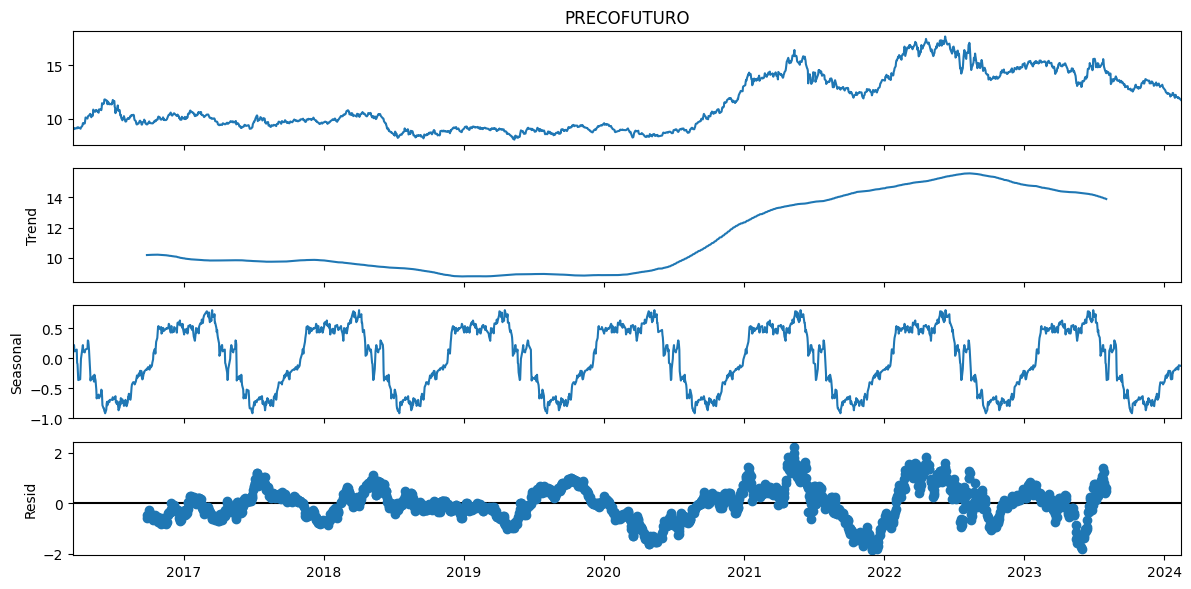

In [28]:
decomp_fut = seasonal_decompose(result_df['PRECOFUTURO'], model='additive', period=252)
fig = decomp_fut.plot()
fig.set_size_inches((12, 6))
fig.tight_layout()
plt.show()

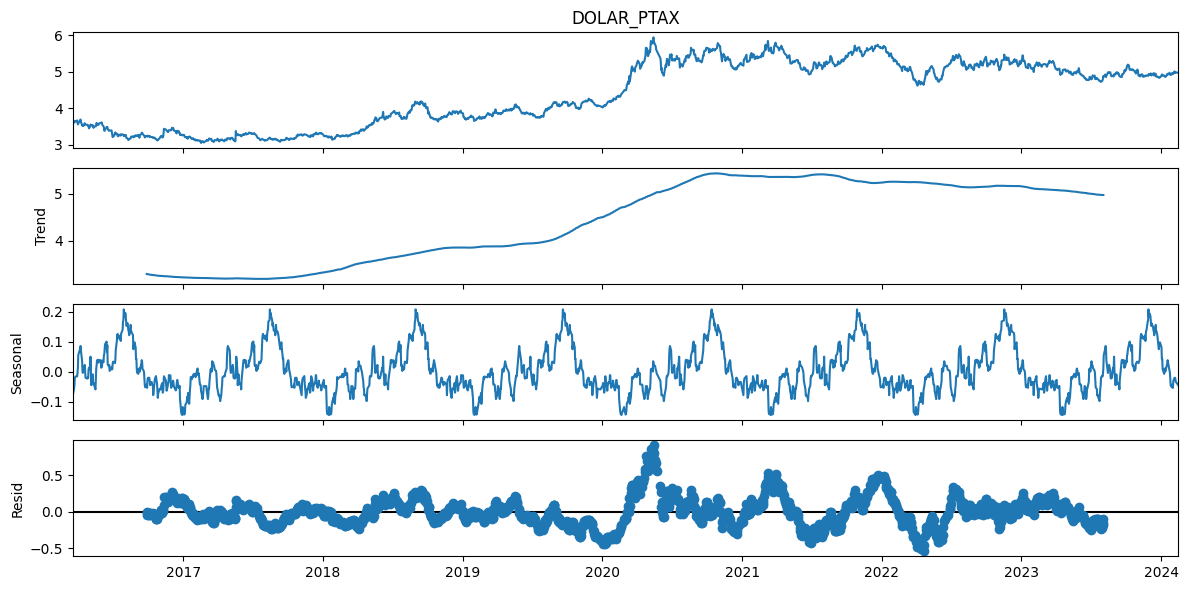

In [29]:
decomp_dolar = seasonal_decompose(result_df['DOLAR_PTAX'], model='additive', period=252)
fig = decomp_dolar.plot()
fig.set_size_inches((12, 6))
fig.tight_layout()
plt.show()

<Axes: xlabel='DATA'>

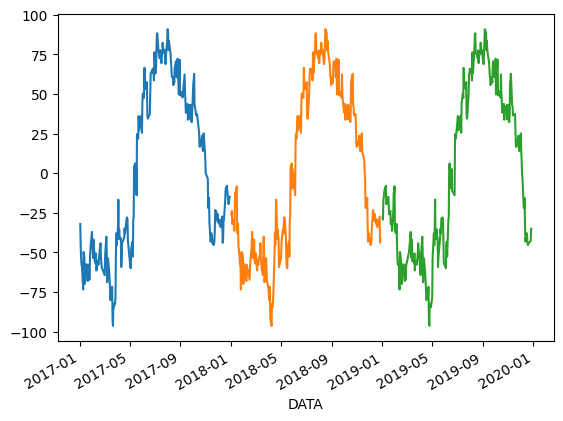

In [30]:
decomp_basis.seasonal['2017-01-01':'2018-01-01'].plot()
decomp_basis.seasonal['2018-01-01':'2019-01-01'].plot()
decomp_basis.seasonal['2019-01-01':'2020-01-01'].plot()

### Índices máximos das sazonalidades

In [31]:
data_maximo_basis = decomp_basis.seasonal.idxmax()
data_maximo_basis     #julho

Timestamp('2016-07-15 00:00:00')

In [32]:
data_maximo_fis = decomp_fis.seasonal.idxmax()
data_maximo_fis      #dezembro

Timestamp('2016-12-26 00:00:00')

In [33]:
data_maximo_fut = decomp_fut.seasonal.idxmax()
data_maximo_fut      #março

Timestamp('2017-03-16 00:00:00')

In [34]:
data_maximo_dolar = decomp_dolar.seasonal.idxmax()
data_maximo_dolar    #julho

Timestamp('2016-07-29 00:00:00')

# Sincronização das fases do basis, dolar, físico e futuro

In [35]:
basis = pd.DataFrame(result_df.BASIS)
result_df.drop(['BASIS'], axis=1, inplace=True)
result_df

,PRECOLOCAL,PRECOFUTURO,DOLAR_PTAX
DATA,,,
2016-03-18,7.907198,8.9750,3.6140
2016-03-21,7.889079,9.0200,3.6223
2016-03-22,7.923202,9.1025,3.6067
2016-03-23,7.823850,9.0525,3.6525
2016-03-28,7.850502,9.0900,3.6401
...,...,...,...
2024-02-05,9.075203,11.9800,5.0047
2024-02-06,9.142060,12.0000,4.9681
2024-02-07,9.259042,11.9000,4.9602


In [36]:
N = len(result_df.columns)
theta_t = fases_hilbert_transform(result_df)
r = np.sqrt( np.sum(np.cos(theta_t), axis=1)**2 + np.sum(np.sin(theta_t), axis=1)**2 ) / N

In [37]:
r1 = r

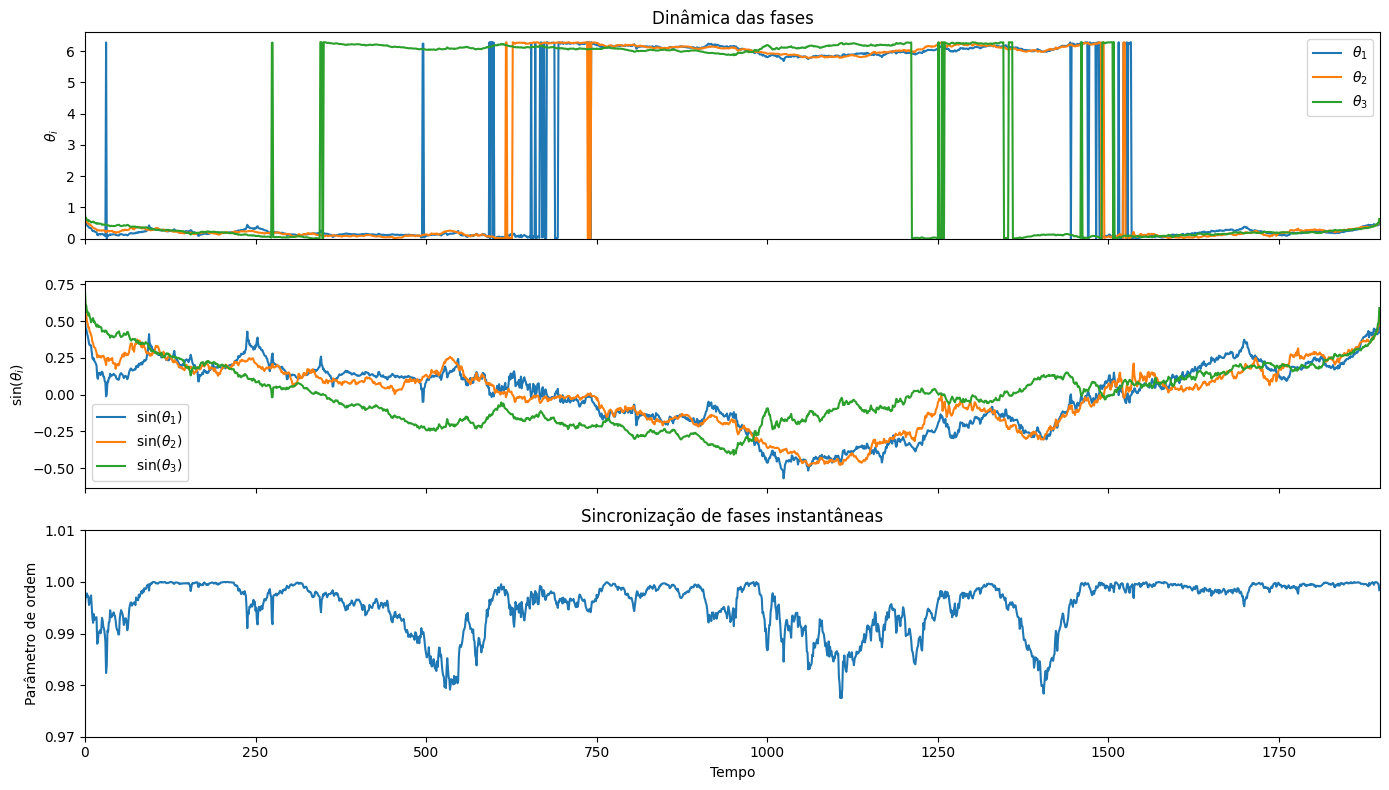

In [38]:
f, ax = plt.subplots(3, 1, figsize=(14,8), sharex=True)
ax[0].set(ylim=[0,2.1*np.pi], ylabel=r'$\theta_i$',title='Dinâmica das fases')
for i in range(0,N):
  ax[0].plot(theta_t[:, i], label=r'$\theta_{%d}$' % (i+1))
  ax[0].legend()

ax[1].set(ylabel=r'$\sin(\theta_i)$')
for i in range(0,N):
  ax[1].plot(np.sin(theta_t[:, i]), label=r'$\sin(\theta_{%d})$' % (i+1))
  ax[1].legend()

ax[2].set(ylim=[0.97,1.01],xlim=[0,len(r)],title='Sincronização de fases instantâneas',xlabel='Tempo',ylabel='Parâmetro de ordem')
ax[2].plot(r)
plt.tight_layout()
plt.show()

## Sincronização das fases dos retornos acumulados do basis, dolar, físico e futuro

<Axes: xlabel='DATA'>

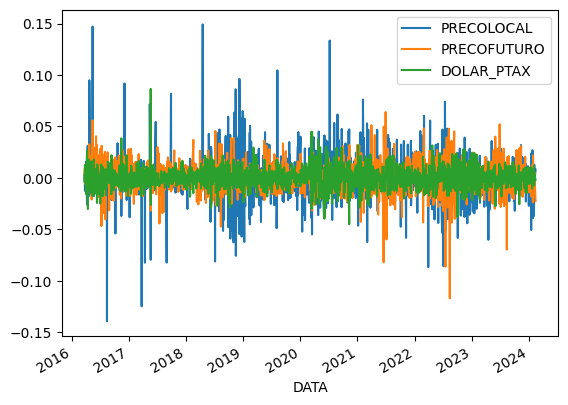

In [39]:
retornos_df = result_df.pct_change().dropna()
retornos_df.plot()

<Axes: xlabel='DATA'>

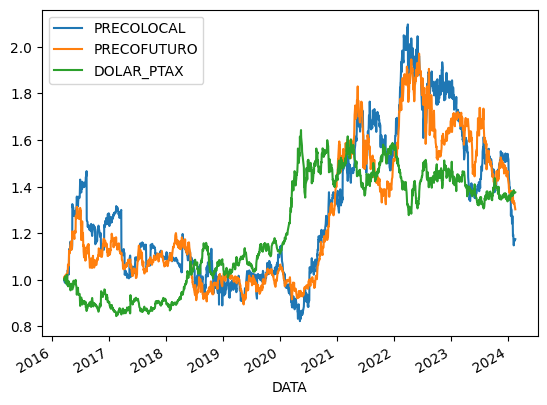

In [40]:
ret_acm = (1+retornos_df).cumprod()
ret_acm.plot()

In [41]:
ret_acm.corr()

,PRECOLOCAL,PRECOFUTURO,DOLAR_PTAX
PRECOLOCAL,1.000000,0.940922,0.555963
PRECOFUTURO,0.940922,1.000000,0.611546
DOLAR_PTAX,0.555963,0.611546,1.000000


In [42]:
ret_acm

,PRECOLOCAL,PRECOFUTURO,DOLAR_PTAX
DATA,,,
2016-03-21,0.997709,1.005014,1.002297
2016-03-22,1.002024,1.014206,0.997980
2016-03-23,0.989459,1.008635,1.010653
2016-03-28,0.992830,1.012813,1.007222
2016-03-29,0.985251,1.020613,1.014970
...,...,...,...
2024-02-05,1.147714,1.334819,1.384809
2024-02-06,1.156169,1.337047,1.374682
2024-02-07,1.170964,1.325905,1.372496


In [43]:
N = len(ret_acm.columns)
theta_t = pd.DataFrame(fases_hilbert_transform(ret_acm))
r = pd.DataFrame(np.sqrt(np.sum(np.cos(theta_t), axis=1)**2 + np.sum(np.sin(theta_t), axis=1)**2 ) / N)

In [44]:
theta_t

,0,1,2
0,0.556259,0.699930,0.785695
1,0.469668,0.571696,0.648647
2,0.462244,0.568915,0.645667
3,0.419646,0.509879,0.598337
4,0.405756,0.505798,0.600826
...,...,...,...
1892,0.462279,0.440245,0.450166
1893,0.418987,0.443089,0.461919
1894,0.441522,0.477265,0.501474
1895,0.427377,0.478858,0.504097


In [45]:
r

,0
0,0.995525
1,0.997315
2,0.997173
3,0.997341
4,0.996831
...,...
1892,0.999959
1893,0.999846
1894,0.999697
1895,0.999490


In [46]:
ret_acm

,PRECOLOCAL,PRECOFUTURO,DOLAR_PTAX
DATA,,,
2016-03-21,0.997709,1.005014,1.002297
2016-03-22,1.002024,1.014206,0.997980
2016-03-23,0.989459,1.008635,1.010653
2016-03-28,0.992830,1.012813,1.007222
2016-03-29,0.985251,1.020613,1.014970
...,...,...,...
2024-02-05,1.147714,1.334819,1.384809
2024-02-06,1.156169,1.337047,1.374682
2024-02-07,1.170964,1.325905,1.372496


In [47]:
r2 = r

In [48]:
basis.reset_index(drop=True, inplace=True)

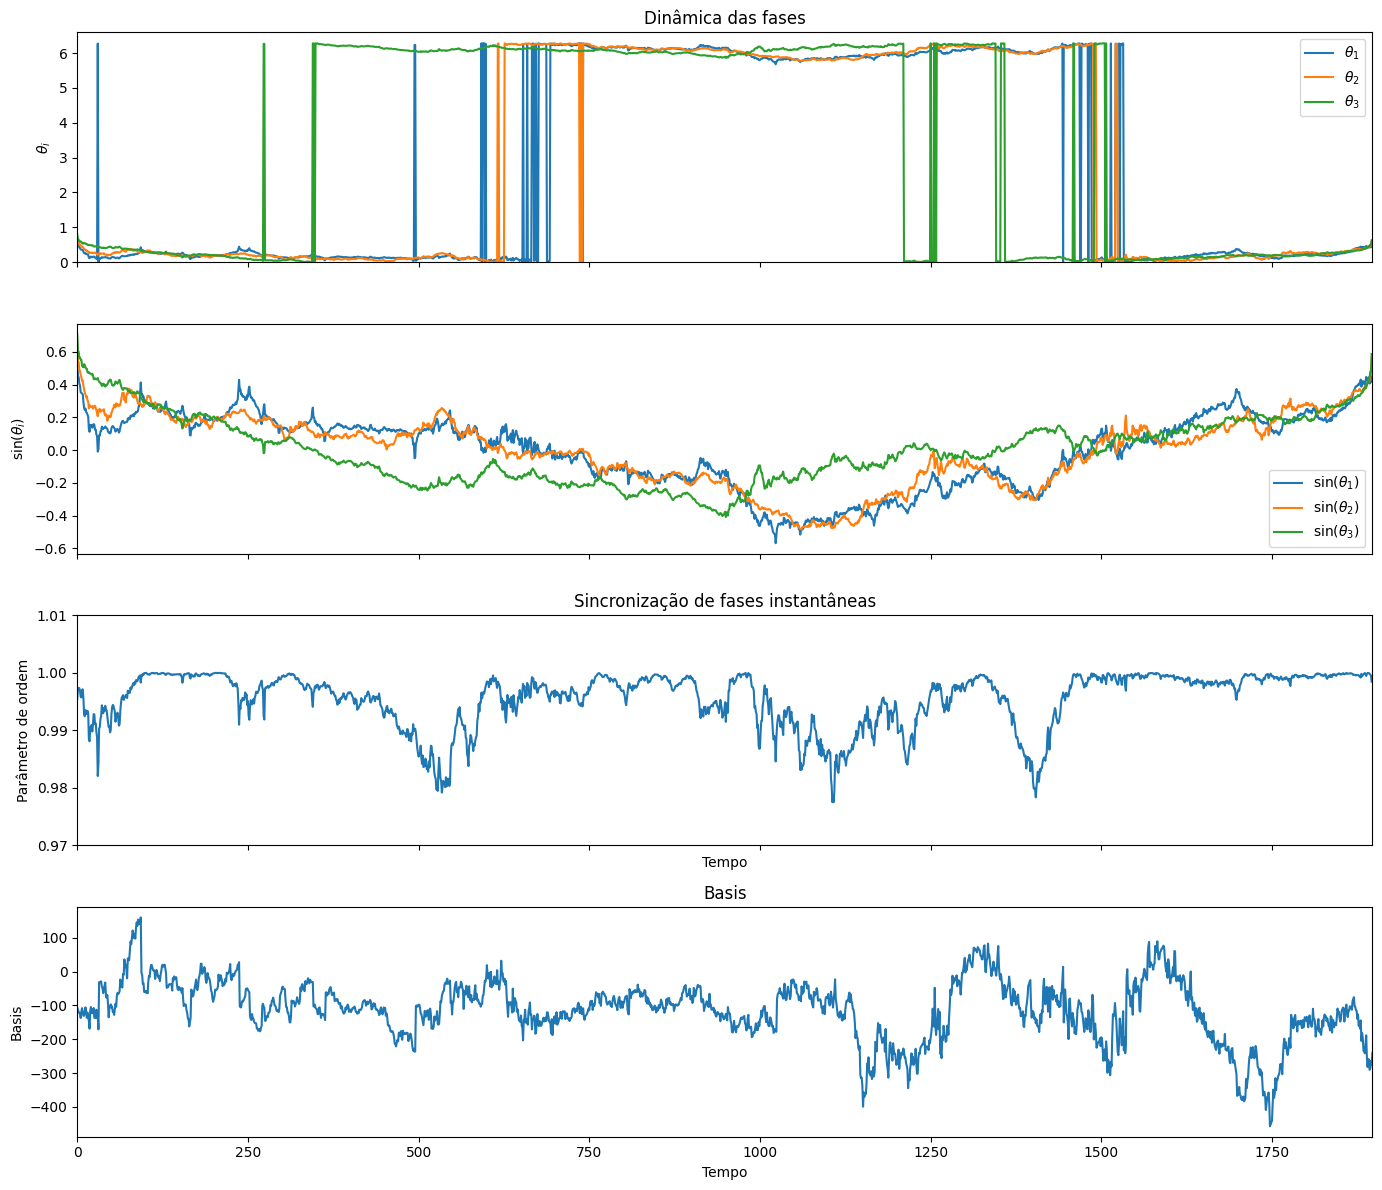

In [49]:
f, ax = plt.subplots(4, 1, figsize=(14,12), sharex=True)
ax[0].set(ylim=[0,2.1*np.pi], ylabel=r'$\theta_i$',title='Dinâmica das fases')
for i in range(0,N):
  #ax[0].plot(theta_t[:, i], label=r'$\theta_{%d}$' % (i+1))
  ax[0].plot(theta_t[i], label=r'$\theta_{%d}$' % (i+1))
ax[0].legend()

ax[1].set(ylabel=r'$\sin(\theta_i)$')
for i in range(0,N):
  ax[1].plot(np.sin(theta_t[i]), label=r'$\sin(\theta_{%d})$' % (i+1))
ax[1].legend(loc='lower right')

ax[2].set(ylim=[0.97,1.01],xlim=[0,len(r)],title='Sincronização de fases instantâneas',xlabel='Tempo',ylabel='Parâmetro de ordem')
ax[2].plot(r)

ax[3].set(title='Basis',xlabel='Tempo',ylabel='Basis')
ax[3].plot(basis.BASIS)
plt.tight_layout()
plt.show()

# Analisando preço físico do grão de soja, futuro e petróleo

In [50]:
petro_df = pd.read_csv(r"C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\wti-crude-oil-prices-10-year-daily-chart.csv")    #o r antes da string significa uma string raw em que o caminho do arquivo é lido normalmente
petro_df

,date,value
0,2014-04-04,101.14
1,2014-04-07,100.44
2,2014-04-08,102.56
3,2014-04-09,103.60
4,2014-04-10,103.40
...,...,...
2533,2024-03-28,83.11
2534,2024-03-29,83.17
2535,2024-04-01,83.71
2536,2024-04-02,85.15


In [51]:
petro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2538 non-null   object 
 1    value  2538 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.8+ KB


In [52]:
petro_df = petro_df.rename(columns={'date':'DATA', ' value':'PETROLEO'})
petro_df['DATA'] = pd.to_datetime(petro_df['DATA'], format='mixed')
petro_df.set_index('DATA', inplace=True)

petro_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2538 entries, 2014-04-04 to 2024-04-03
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETROLEO  2538 non-null   float64
dtypes: float64(1)
memory usage: 39.7 KB


In [53]:
petro_df.dropna(inplace=True)

In [54]:
result_df = pd.merge(result_df[['PRECOLOCAL', 'PRECOFUTURO']], petro_df, on='DATA')
result_df

,PRECOLOCAL,PRECOFUTURO,PETROLEO
DATA,,,
2016-03-18,7.907198,8.9750,40.460
2016-03-21,7.889079,9.0200,41.198
2016-03-22,7.923202,9.1025,41.450
2016-03-23,7.823850,9.0525,39.790
2016-03-28,7.850502,9.0900,39.390
...,...,...,...
2024-02-05,9.075203,11.9800,72.780
2024-02-06,9.142060,12.0000,73.310
2024-02-07,9.259042,11.9000,73.860


<Axes: xlabel='DATA'>

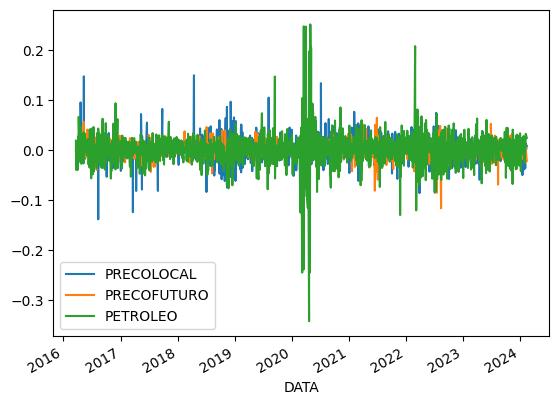

In [55]:
retornos_df = result_df.pct_change().dropna()
retornos_df.plot()

<Axes: xlabel='DATA'>

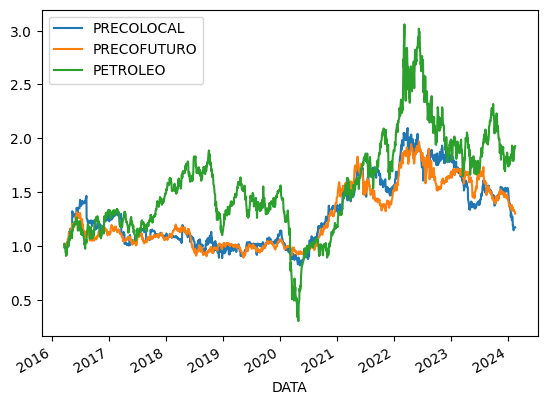

In [56]:
ret_acm = (1+retornos_df).cumprod()
ret_acm.plot()

In [57]:
N = len(ret_acm.columns)
theta_t = pd.DataFrame(fases_hilbert_transform(ret_acm))
r = pd.DataFrame(np.sqrt(np.sum(np.cos(theta_t), axis=1)**2 + np.sum(np.sin(theta_t), axis=1)**2 ) / N)

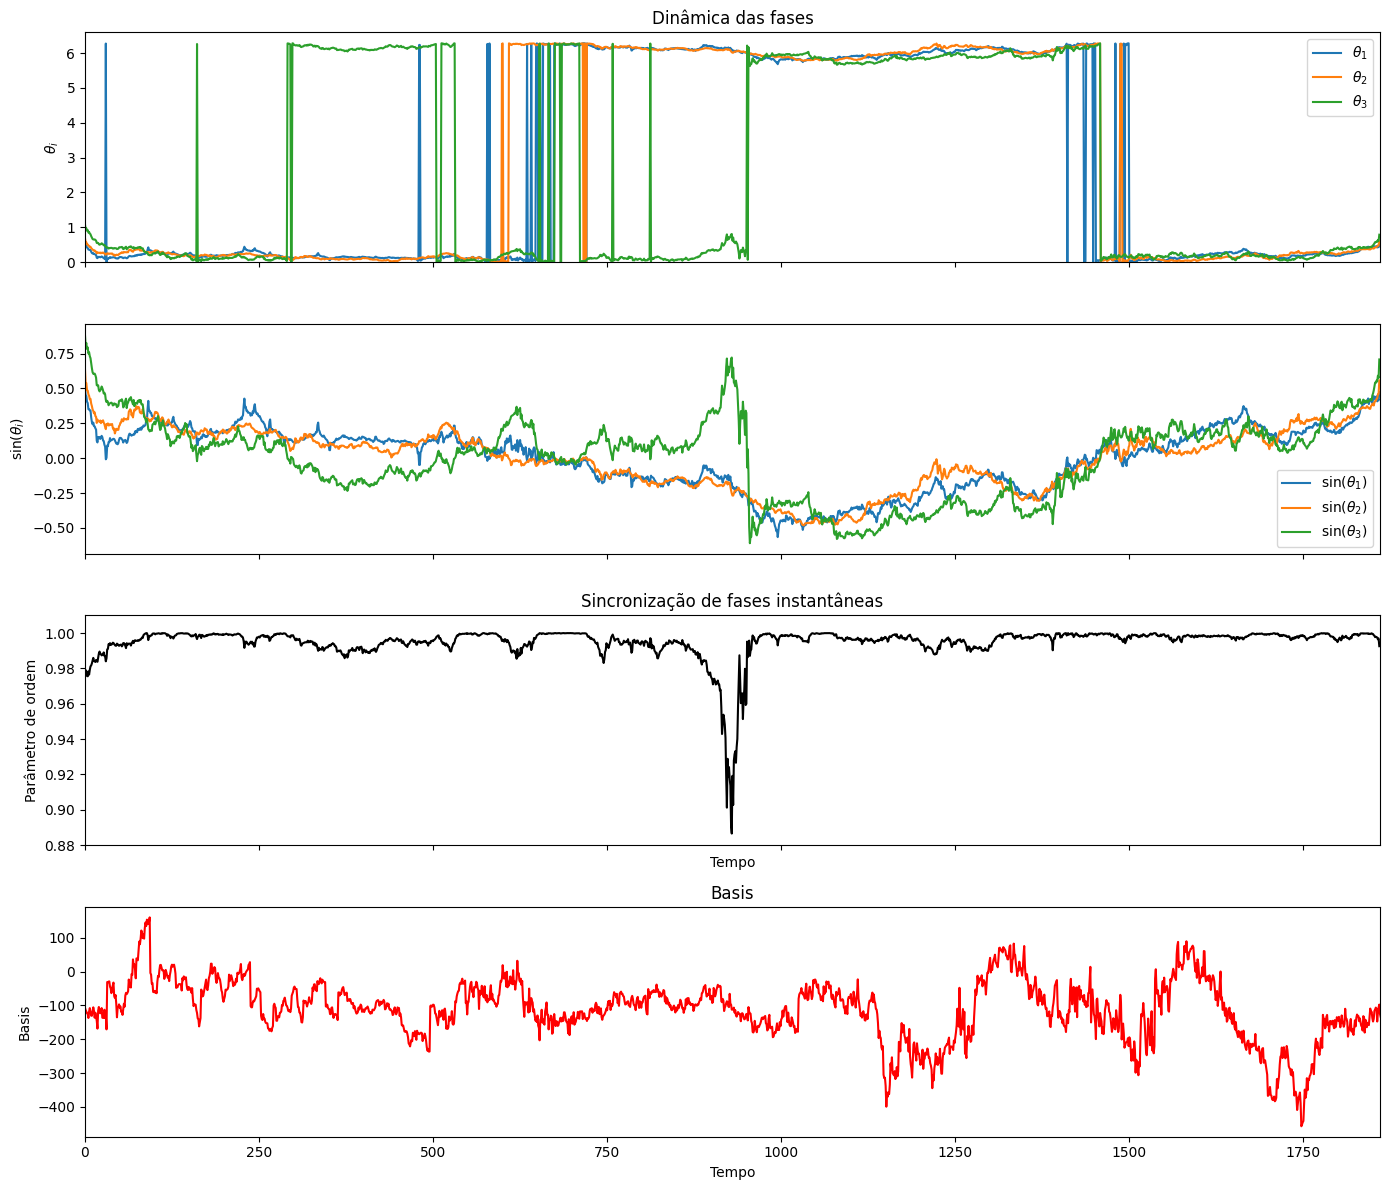

In [58]:
f, ax = plt.subplots(4, 1, figsize=(14,12), sharex=True)
ax[0].set(ylim=[0,2.1*np.pi], ylabel=r'$\theta_i$',title='Dinâmica das fases')
for i in range(0,N):
  ax[0].plot(theta_t[i], label=r'$\theta_{%d}$' % (i+1))
ax[0].legend()

ax[1].set(ylabel=r'$\sin(\theta_i)$')
for i in range(0,N):
  ax[1].plot(np.sin(theta_t[i]), label=r'$\sin(\theta_{%d})$' % (i+1))
ax[1].legend(loc='lower right')

ax[2].set(ylim=[0.88,1.01],xlim=[0,len(r)],title='Sincronização de fases instantâneas',xlabel='Tempo',ylabel='Parâmetro de ordem')
ax[2].plot(r, color='black')

ax[3].set(title='Basis',xlabel='Tempo',ylabel='Basis')
ax[3].plot(basis.BASIS, color='red')
plt.tight_layout()
plt.show()

In [65]:
corr0 = basis.BASIS.corr(theta_t[0])
corr0

-0.03536769773520609

In [66]:
corr1 = basis.BASIS.corr(theta_t[1])
corr1

-0.009082729066903586

In [67]:
corr2 = basis.BASIS.corr(theta_t[2])
corr2

-0.08313488952794393

In [69]:
len(r)

1860

In [70]:
len(basis.BASIS)

1898

In [71]:
corrR = r.corr(basis.BASIS[:1860])
corrR

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().